In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [4]:
# Importing all required packages
from datetime import date
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [5]:
data = pd.read_csv('telecom_churn_data.csv')

data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


### Inference:

- Here there are 3 types in data : int,float : Numerical & object: Categorical.
- But need to find the real types of these columns by doing some visualization.

In [7]:
data.shape

(99999, 226)

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [9]:
def missing_percentages(dataframe):
    return round(100*(dataframe.isnull().sum()/len(dataframe.index)), 2).sort_values(ascending = False)   

In [10]:
missing_percentages(data)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

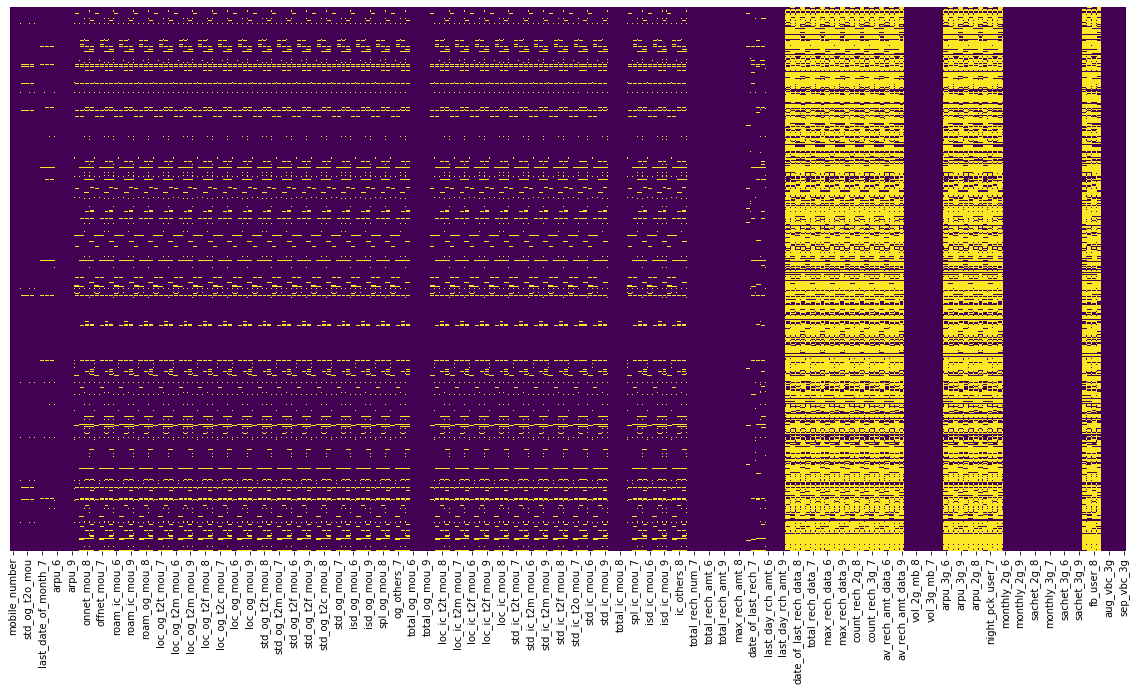

In [11]:
#Plotting Missing values in each column of df_clean:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
high_missing = data.loc[:,list(missing_percentages(data)> 70)].columns

In [13]:
high_missing

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8'],
      dtype='object')

In [14]:
high_missing_df = data.loc[:,list(missing_percentages(data)> 70)]

In [15]:
high_missing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 40 columns):
mobile_number           99999 non-null int64
circle_id               99999 non-null int64
loc_og_t2o_mou          98981 non-null float64
std_og_t2o_mou          98981 non-null float64
loc_ic_t2o_mou          98981 non-null float64
last_date_of_month_6    99999 non-null object
last_date_of_month_7    99398 non-null object
last_date_of_month_8    98899 non-null object
last_date_of_month_9    98340 non-null object
arpu_6                  99999 non-null float64
arpu_7                  99999 non-null float64
arpu_8                  99999 non-null float64
arpu_9                  99999 non-null float64
onnet_mou_6             96062 non-null float64
onnet_mou_7             96140 non-null float64
onnet_mou_8             94621 non-null float64
onnet_mou_9             92254 non-null float64
offnet_mou_6            96062 non-null float64
offnet_mou_7            96140 non-null float64
offnet

### Inference:

Here "date_of_last_rech_data, total_rech_data, max_rech_data, count_rech_2g, count_rech_3g, av_rech_amt_data, arpu_2g,arpu_3g, night_pck_user, fb_user" are the highest (>70%) missing values.

Any how we will consider "total_rech_amt" so these rech_data cols are insignificant.
As well as it is not required to impute this much high missing cols.so dropping the same.

In [16]:
#Drop the columns having more than 30% missing values.
data = data.drop(data.loc[:,list(round(100*(data.isnull().sum()/len(data.index)), 2)> 70)].columns,1)

In [17]:
print(type(missing_percentages(data)))

<class 'pandas.core.series.Series'>


In [18]:
#s = s[s != 1]
col_miss = missing_percentages(data)
col_miss[col_miss!=0]

loc_ic_t2m_mou_9        7.75
std_og_t2t_mou_9        7.75
std_ic_t2f_mou_9        7.75
std_ic_t2t_mou_9        7.75
roam_og_mou_9           7.75
loc_ic_mou_9            7.75
loc_og_t2t_mou_9        7.75
loc_ic_t2f_mou_9        7.75
roam_ic_mou_9           7.75
ic_others_9             7.75
loc_og_mou_9            7.75
std_ic_t2o_mou_9        7.75
offnet_mou_9            7.75
loc_ic_t2t_mou_9        7.75
std_ic_mou_9            7.75
onnet_mou_9             7.75
og_others_9             7.75
std_og_mou_9            7.75
isd_ic_mou_9            7.75
std_og_t2m_mou_9        7.75
std_og_t2f_mou_9        7.75
loc_og_t2f_mou_9        7.75
std_og_t2c_mou_9        7.75
spl_ic_mou_9            7.75
isd_og_mou_9            7.75
loc_og_t2c_mou_9        7.75
spl_og_mou_9            7.75
loc_og_t2m_mou_9        7.75
std_ic_t2m_mou_9        7.75
spl_ic_mou_8            5.38
std_ic_t2f_mou_8        5.38
isd_ic_mou_8            5.38
std_ic_t2o_mou_8        5.38
loc_og_mou_8            5.38
loc_ic_t2f_mou

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 186 entries, mobile_number to sep_vbc_3g
dtypes: float64(143), int64(35), object(8)
memory usage: 141.9+ MB


In [20]:
#Checking if any single info features exist?
cols=[]
for col in data.columns:
    if data[col].nunique()==1:
        print(col,data[col].unique())
        cols.append(col)
print('single valued columns',cols)

circle_id [109]
loc_og_t2o_mou [ 0. nan]
std_og_t2o_mou [ 0. nan]
loc_ic_t2o_mou [ 0. nan]
last_date_of_month_6 ['6/30/2014']
last_date_of_month_7 ['7/31/2014' nan]
last_date_of_month_8 ['8/31/2014' nan]
last_date_of_month_9 ['9/30/2014' nan]
std_og_t2c_mou_6 [nan  0.]
std_og_t2c_mou_7 [nan  0.]
std_og_t2c_mou_8 [ 0. nan]
std_og_t2c_mou_9 [nan  0.]
std_ic_t2o_mou_6 [nan  0.]
std_ic_t2o_mou_7 [nan  0.]
std_ic_t2o_mou_8 [ 0. nan]
std_ic_t2o_mou_9 [nan  0.]
single valued columns ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [21]:
#Dropped those single info features.
data.drop(columns=cols,inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 170 entries, mobile_number to sep_vbc_3g
dtypes: float64(132), int64(34), object(4)
memory usage: 129.7+ MB


In [23]:
#Checking if any two valued records features exist?
cols_2=[]
for col in data.columns:
    if data[col].nunique()==2:
        print(col,data[col].value_counts())
        cols_2.append(col)
print('Two valued record features',len(cols_2))

Two valued record features 0


In [24]:
#after quick validation of single,two value features. Shape of data is:
data.shape

(99999, 170)

In [25]:
less_missperc_colums = data.loc[:,list(missing_percentages(data)> 0)].columns

In [26]:
mcl = list(less_missperc_colums)
mcl

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_

In [27]:
len(mcl)

112

### Inference

Among less_missing_columns we have: mobile_number, arpu(average revenue per user), all king of outing & Incoming call features like onnet_mou(same n/w voice calls), offnet_mou(outside n/w voice calls),loc,std,isd,spl_ic or og_mou etc..

In [28]:
#Here in missing features out of 
mis_features_df = data.loc[:,list(missing_percentages(data)> 0)]
mis_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 112 entries, mobile_number to spl_ic_mou_8
dtypes: float64(111), int64(1)
memory usage: 85.4 MB


In [29]:
#Here out of all missing none are object type.so checking those object type features in data:
object_type = data.loc[:, data.dtypes == np.object]

In [30]:
object_type.columns

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9'],
      dtype='object')

data_copy.drop(data_copy[['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9']], axis = 1,inplace = True)

In [31]:
data_copy= data.copy()

In [32]:
#I don't see any great insights which contribute from those object features: "Last recharge dates". So dropping.
df_clean = data_copy.select_dtypes(exclude=['object'])

In [33]:
df_clean.shape

(99999, 166)

In [34]:
# #Here we are using (fancyimpute) IterativeImputer: as all of the features are numerical after data cleanup.
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

df_columns = df_clean.columns

In [35]:
#As mentioned using IterativeImputer: This step will take a lot of time 
# ii = IterativeImputer()
# df = pd.DataFrame(ii.fit_transform(df_clean))
df = df_clean.fillna(df_clean.mean())
df.columns = df_columns

In [36]:
df.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       ...
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=166)

In [37]:
df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,132.395875,133.670805,0.00,130.302327,197.935577,197.045133,0.00,190.337222,9.950013,7.149898,0.00,6.343841,13.911337,9.818732,0.00,8.555519,47.100763,46.47301,0.00,44.584446,93.342088,91.397131,0.00,90.463192,3.751013,3.792985,0.00,3.655123,1.123056,1.3685,0.00,1.232726,144.201175,141.670476,0.00,138.70997,79.82987,83.299598,0.00,82.342919,87.299624,90.804137,0.00,86.276622,1.129011,1.11501,0.00,1.042362,168.261218,175.221436,0.00,169.664466,0.798277,0.776572,0.0,0.723892,3.916811,4.978279,0.00,4.412767,0.454157,0.030235,0.0,0.047456,0.00,0.00,0.00,0.00,47.922365,47.99052,0.16,46.281794,107.47565,107.120493,4.13,106.155471,12.084305,12.599697,1.15,12.173105,167.491059,167.71954,5.44,164.619293,9.575993,10.011904,0.00,9.432479,20.72224,21.656415,0.00,19.620913,2.156397,2.216923,0.00,2.173419,32.457179,33.887833,0.00,31.229344,0.00,0.00,5.44,0.00,0.061557,0.033585,0.0,0.163137,7.460608,8.334936,0.0,8.063003,0.854656,1.01296,0.0,1.017162,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,34.047,355.074,268.321,86.285,24.110000,78.680000,7.68,18.340000,15.740000,99.840000,304.76,53.760000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,23.880000,74.56000,7.68,18.340000,11.510000,75.940000,291.86,53.760000,0.000000,0.000000,0.00,0.000000,0.000000,2.9100,0.00,0.000000,35.390000,150.510000,299.54,72.11000,0.23000,4.110000,0.00,0.000000,0.000000,0.460000,0.13,0.000000,0.000000,0.00000,0.00,0.000000,0.230000,4.580000,0.13,0

In [38]:
#it will return empty as all the cols were imputed.
missing_percentages(df)

sep_vbc_3g            0.0
spl_og_mou_6          0.0
isd_og_mou_8          0.0
isd_og_mou_7          0.0
isd_og_mou_6          0.0
std_og_mou_9          0.0
std_og_mou_8          0.0
std_og_mou_7          0.0
std_og_mou_6          0.0
std_og_t2f_mou_9      0.0
std_og_t2f_mou_8      0.0
std_og_t2f_mou_7      0.0
std_og_t2f_mou_6      0.0
std_og_t2m_mou_9      0.0
std_og_t2m_mou_8      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_6      0.0
std_og_t2t_mou_9      0.0
std_og_t2t_mou_8      0.0
isd_og_mou_9          0.0
spl_og_mou_7          0.0
std_og_t2t_mou_6      0.0
spl_og_mou_8          0.0
loc_ic_t2m_mou_9      0.0
loc_ic_t2m_mou_8      0.0
loc_ic_t2m_mou_7      0.0
loc_ic_t2m_mou_6      0.0
loc_ic_t2t_mou_9      0.0
loc_ic_t2t_mou_8      0.0
loc_ic_t2t_mou_7      0.0
loc_ic_t2t_mou_6      0.0
total_og_mou_9        0.0
total_og_mou_8        0.0
total_og_mou_7        0.0
total_og_mou_6        0.0
og_others_9           0.0
og_others_8           0.0
og_others_7           0.0
og_others_6 

In [39]:
df.head() 

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,132.395875,133.670805,0.00,130.302327,197.935577,197.045133,0.00,190.337222,9.950013,7.149898,0.00,6.343841,13.911337,9.818732,0.00,8.555519,47.100763,46.47301,0.00,44.584446,93.342088,91.397131,0.00,90.463192,3.751013,3.792985,0.00,3.655123,1.123056,1.3685,0.00,1.232726,144.201175,141.670476,0.00,138.70997,79.82987,83.299598,0.00,82.342919,87.299624,90.804137,0.00,86.276622,1.129011,1.11501,0.00,1.042362,168.261218,175.221436,0.00,169.664466,0.798277,0.776572,0.0,0.723892,3.916811,4.978279,0.00,4.412767,0.454157,0.030235,0.0,0.047456,0.00,0.00,0.00,0.00,47.922365,47.99052,0.16,46.281794,107.47565,107.120493,4.13,106.155471,12.084305,12.599697,1.15,12.173105,167.491059,167.71954,5.44,164.619293,9.575993,10.011904,0.00,9.432479,20.72224,21.656415,0.00,19.620913,2.156397,2.216923,0.00,2.173419,32.457179,33.887833,0.00,31.229344,0.00,0.00,5.44,0.00,0.061557,0.033585,0.0,0.163137,7.460608,8.334936,0.0,8.063003,0.854656,1.01296,0.0,1.017162,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,34.047,355.074,268.321,86.285,24.110000,78.680000,7.68,18.340000,15.740000,99.840000,304.76,53.760000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,23.880000,74.56000,7.68,18.340000,11.510000,75.940000,291.86,53.760000,0.000000,0.000000,0.00,0.000000,0.000000,2.9100,0.00,0.000000,35.390000,150.510000,299.54,72.11000,0.23000,4.110000,0.00,0.000000,0.000000,0.460000,0.13,0.000000,0.000000,0.00000,0.00,0.000000,0.230000,4.580000,0.13,0

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 166 entries, mobile_number to sep_vbc_3g
dtypes: float64(132), int64(34)
memory usage: 126.6 MB


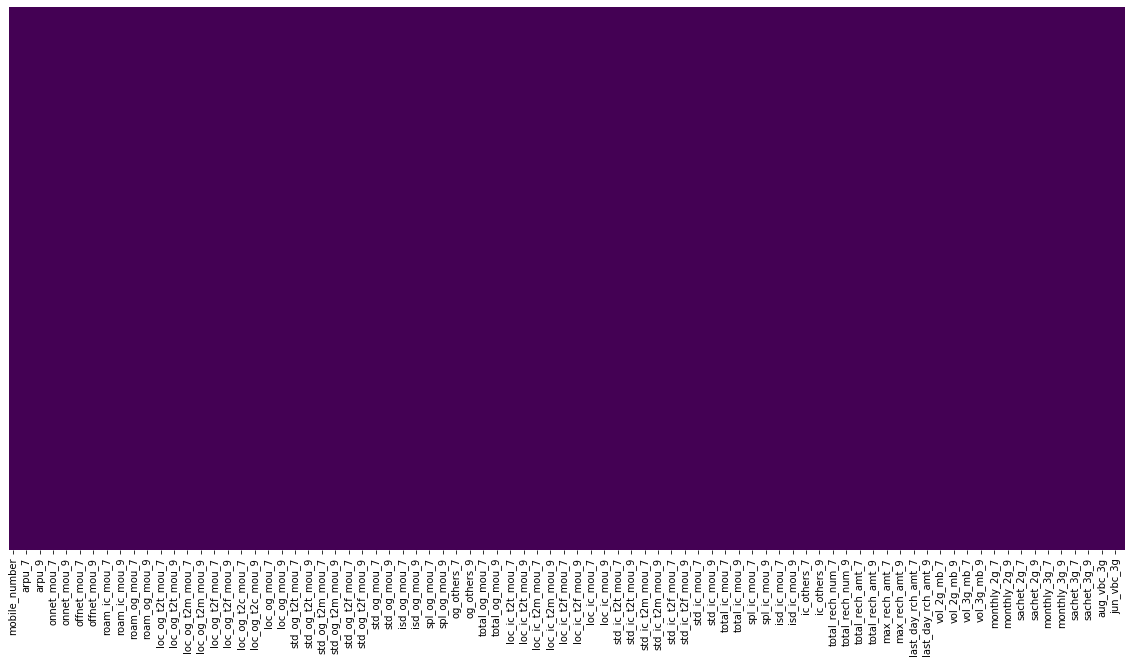

In [41]:
#Plotting Missing values in each column of df_clean:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

    Filter HVC: (High Value Customer)
    Supervised Modeling : x & y we need
    Derive Churn / Target need to be derived(y): 9th month data. So we do remove all cols of 9th month data
            Avg customer calling/Data usage=0 ->churn
            Telecom Churn can be two types:
            1. Usage call/data = 0 (clling minutes: ic/og + data usage(2g/3g)) = 0
            2. Revenue from user = 0 as there is no spend from him.
              Here we are only working on usage based.

Next step is data preparation: Derive some Additional features, EDA, Outlier treatment.Split into Train & Test.
    M1: Interpretable Model.(only 1 model is needed: Logistic Regression/RandomForest)
    M2: Model with Good prediction (using PCA- 3 diff models: Logistic or Regularized -
                                    Regression/RandomFores , SVM)      
        
In both the case we need to perform Hyperparamter Tuning.

Perform Outlier after Ftilering then we have less data.

In Modelling part will be done on 6,7,8

Class imbalance need to be handled - SMOTE,weight_of_class method.

#Hyperparameter tuning is taking time mention in comments it will take time this much time.

u can drop mobile number.

Logistic Regression 
Very important we need to remove Highly correlated columns in our model. check correlation 
VIF on final model: atleast for one column we need to check.
    
very few categorical columns do some EDA & find them out.


if a person is not recharging it can be null but actually it is Null by default so we should not drop this.

Add recommendations using the model for the company in the notebook

if we know pipeline ensamble do

categorical columns have skewness, drop those if we have such columns as the concepts were not done. 

Drop single value columns

sensitivity is what we looking,check the type -2 error is low.

How each step is explained, as it is the conclusion of all the ML models.

RFE can be used.

Log+RF

Same can be used those two here but with PCA , DT.

Gradient Boosting is underperform. It will be failed when lot of features.

Mice & Iterative imputer is same but MICE is currently not available

We have to mention this step use fancy imputer. 

Data imbalance need to be done for training data. So do b4 modellsing part.

In [43]:
df.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       ...
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=166)

In [ ]:
# df_like_mou = df[df.columns[df.columns.to_series().str.contains('og_mou_')]]
# df_like_mou.head()

In [ ]:
#df_like_mou.columns

In [44]:
df['total_rech_6'] = df['total_ic_mou_6'] + df['total_og_mou_6']+df['vol_2g_mb_6'] + df['vol_3g_mb_6'] 
df['total_rech_7'] = df['total_ic_mou_7']+ df['total_og_mou_7']+df['vol_2g_mb_7'] + df['vol_3g_mb_6']  



In [45]:
#Mean of both 'total_rech_6' & 'total_rech_6' 
df['average_rech_6_7'] = df[['total_rech_6', 'total_rech_7']].mean(axis=1)
df['average_rech_6_7'].head()

0     99.295
1    228.985
2    728.920
3    427.615
4    391.670
Name: average_rech_6_7, dtype: float64

In [46]:
df['average_rech_6_7'].quantile(q= .7)

755.4459999999999

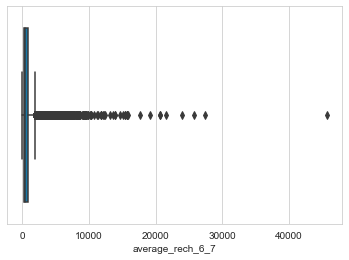

In [47]:
#Boxplot:
#Boxplot to find out the range of LotFrontage:
sns.set_style('whitegrid')
plt.figure(figsize = (6,4))
sns.boxplot(x='average_rech_6_7',data=df,palette='winter')

In [48]:
cdf = df[df['average_rech_6_7'] > df['average_rech_6_7'].quantile(0.7)]
cdf.shape

(30000, 169)

In [49]:
df_bkp = cdf.copy()
df_bkp.shape

(30000, 169)

In [50]:
df_bkp['average_rech_6_7'].quantile(q=0)

755.4499999999999

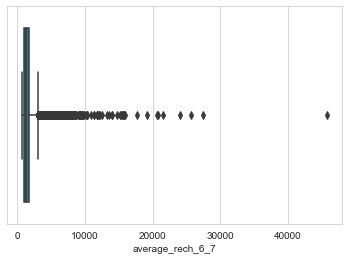

In [51]:
sns.set_style('whitegrid')
plt.figure(figsize = (6,4))
sns.boxplot(x='average_rech_6_7',data=df_bkp, palette='winter')

In [52]:
cdf_like_mou = df_bkp[df_bkp.columns[df_bkp.columns.to_series().str.contains('_mou_')]] 
cdf_like_mou.head()


,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9
6,71.03,45.03,76.66,15.230000,262.73,49.24,92.08,50.330000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,71.03,45.03,76.14,15.230000,252.23,48.71,80.63,50.330000,10.38,0.00,0.00,0.000000,0.11,0.0,0.00,0.000000,333.64,93.74,156.78,65.56000,0.00,0.00,0.51,0.000000,0.00,0.53,11.45,0.000000,0.00,0.00,0.00,0.000000,0.00,0.53,11.96,0.000000,0.0,0.00,0.00,0.000000,0.11,0.53,0.00,0.000000,333.76,94.81,168.74,65.91,1857.99,1427.04,1896.43,2334.880000,248.64,336.96,265.28,231.410000,20.24,22.69,2.51,6.190000,2126.89,1786.71,2164.23,2572.490000,0.00,0.00,0.00,0.000000,1.39,0.76,2.60,0.000000,0.00,0.00,0.00,0.000000,1.39,0.76,2.60,0.000000,2128.41,1788.06,2167.11,2572.49,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.000000
7,57.84,54.68,52.29,130.302327,453.43,567.16,325.91,190.337222,16.23,33.49,31.64,6.343841,23.74,12.59,38.06,8.555519,51.39,31.38,40.28,44.584446,308.63,447.38,162.28,90.463192,62.13,55.14,53.23,3.655123,0.00,0.0,0.00,1.232726,422.16,533.91,255.79,138.70997,4.30,23.29,12.01,82.342919,49.89,31.76,49.14,86.276622,6.66,20.08,16.68,1.042362,60.86,75.14,77.84,169.664466,0.0,0.18,10.01,0.723892,4.50,0.00,6.50,4.412767,487.53,609.24,350.16,0.00,58.14,32.26,27.31,46.281794,217.56,221.49,121.19,106.155471,152.16,101.46,39.53,12.173105,427.88,355.23,188.04,164.619293,36.89,11.83,30.39,9.432479,91.44,126.99,141.33,19.620913,52.19,34.24,22.21,2.173419,180.54,173.08,193.94,31.229344,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.163137,2.06,14.53,31.59,8.063003
13,501.76,108.39,534.24,244.810000,413.31,119.28,482.46,214.060000,23.53,144.24,72.11,136.780000,7.98,35.26,1.44,12.780000,49.63,6.19,36.01,6.140000,151.13,47.28,294.46,108.240000,4.54,0.00,23.51,5.290000,0.00,0.0,0.49,0.000000,205.31,53.48,353.99,119.69000,446.41,85.98,498.23,230.380000,255.36,52.94,156.94,96.010000,0.00,0.00,0.00,0.000000,701.78,138.93,655.18,326.390000,0.0,0.00,1.29,0.000000,0.00,0.00,4.78,0.000000,907.09,192.41,1015.26,446.09,67.88,7.58,52.58,24.980000,142.88,18.53,195.18,104.790000,4.81,0.00,7.49,8.510000,215.58,26.11,255.26,138.290000,115.68,38.29,154.58,62.390000,308.13,29.79,317.91,151.510000,0.00,0.00,1.91,0.000000,423.81,68.09,474.41,213.910000,968.61,172.58,1144.53,631.86,0.45,0.0,0.0,0.000000,245.28,62.11,393.39,259.330000
21,102.41,132.11,85.14,161.630000,757.93,896.68,983.39,869.890000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,4.48,6.16,23.34,29.9800

In [54]:
df_bkp.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_6,total_rech_7,average_rech_6_7
count,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000

In [55]:
df_like_9 = df_bkp[df_bkp.columns[df_bkp.columns.to_series().str.contains('_9')]]
df_like_9.head()

,arpu_9,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_og_t2f_mou_9,std_og_mou_9,isd_og_mou_9,spl_og_mou_9,og_others_9,total_og_mou_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_mou_9,total_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9,total_rech_num_9,total_rech_amt_9,max_rech_amt_9,last_day_rch_amt_9,vol_2g_mb_9,vol_3g_mb_9,monthly_2g_9,sachet_2g_9,monthly_3g_9,sachet_3g_9
6,114.751,15.230000,50.330000,0.000000,0.000000,15.230000,50.330000,0.000000,0.000000,65.56000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.350000,65.91,2334.880000,231.410000,6.190000,2572.490000,0.000000,0.000000,0.000000,0.000000,2572.49,0.000000,0.000000,0.000000,7,141,30,24,0.0,0.0,0,0,0,0
7,500.000,130.302327,190.337222,6.343841,8.555519,44.584446,90.463192,3.655123,1.232726,138.70997,82.342919,86.276622,1.042362,169.664466,0.723892,4.412767,0.047456,0.00,46.281794,106.155471,12.173105,164.619293,9.432479,19.620913,2.173419,31.229344,0.00,0.163137,8.063003,1.017162,3,0,0,0,0.0,0.0,0,0,0,0
13,322.732,244.810000,214.060000,136.780000,12.780000,6.140000,108.240000,5.290000,0.000000,119.69000,230.380000,96.010000,0.000000,326.390000,0.000000,0.000000,0.000000,446.09,24.980000,104.790000,8.510000,138.290000,62.390000,151.510000,0.000000,213.910000,631.86,0.000000,259.330000,20.310000,7,353,130,0,0.0,0.0,0,0,0,0
21,578.596,161.630000,869.890000,0.000000,0.000000,29.980000,107.540000,0.000000,0.000000,137.53000,131.640000,762.340000,0.000000,893.990000,0.000000,0.000000,0.000000,1031.53,17.990000,113.460000,8.410000,139.880000,16.740000,95.980000,0.000000,112.730000,252.61,0.000000,0.000000,0.000000,17,680,50,30,0.0,0.0,0,0,0,0
24,473.030,138.040000,481.860000,0.000000,0.000000,31.580000,207.180000,33.130000,4.780000,271.89000,106.460000,222.960000,10.010000,339.440000,0.000000,16.430000,0.000000,627.78,19.510000,115.760000,132.990000,268.280000,24.380000,18.580000,18.780000,61.740000,330.03,0.000000,0.000000,0.000000,6,421,250,0,0.0,0.0,0,0,0,0


In [56]:
df_like_9.shape

(30000, 40)

In [57]:
df_bkp['total_rech_9'] = df_bkp['total_ic_mou_9'] + df_bkp['total_og_mou_9']+df_bkp['vol_2g_mb_9'] + df_bkp['vol_3g_mb_9'] 

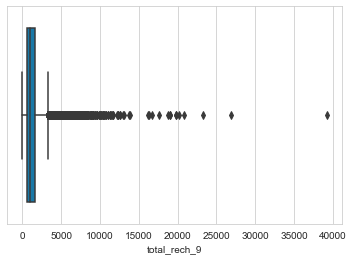

In [58]:
sns.set_style('whitegrid')
plt.figure(figsize = (6,4))
sns.boxplot(x='total_rech_9',data=df_bkp, palette='winter')

In [59]:
df_bkp.shape

(30000, 170)

In [60]:
def f(df_bkp):
    if df_bkp['total_rech_9'] == 0:
        val = 1
    else:
        val = 0
    return val

df_bkp['is_churn'] = df_bkp.apply(f, axis=1)
df_bkp.nunique()

mobile_number         30000
arpu_6                29088
arpu_7                28978
arpu_8                28008
arpu_9                26987
onnet_mou_6           17724
onnet_mou_7           17714
onnet_mou_8           16485
onnet_mou_9           15629
offnet_mou_6          21734
offnet_mou_7          21634
offnet_mou_8          20348
offnet_mou_9          19477
roam_ic_mou_6          3378
roam_ic_mou_7          2771
roam_ic_mou_8          3115
roam_ic_mou_9          2946
roam_og_mou_6          3862
roam_og_mou_7          3246
roam_og_mou_8          3574
roam_og_mou_9          3402
loc_og_t2t_mou_6      11203
loc_og_t2t_mou_7      11183
loc_og_t2t_mou_8      10692
loc_og_t2t_mou_9      10310
loc_og_t2m_mou_6      16249
loc_og_t2m_mou_7      16273
loc_og_t2m_mou_8      15485
loc_og_t2m_mou_9      14967
loc_og_t2f_mou_6       3097
loc_og_t2f_mou_7       3093
loc_og_t2f_mou_8       2971
loc_og_t2f_mou_9       2950
loc_og_t2c_mou_6       1716
loc_og_t2c_mou_7       1765
loc_og_t2c_mou_8    

In [61]:
df_like_9.columns

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9',
       'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9'],
      dtype='object')

In [62]:
df_bkp = df_bkp.drop(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9',
       'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9','total_rech_9'],axis = 1)

In [63]:
corr = df_bkp.corr()

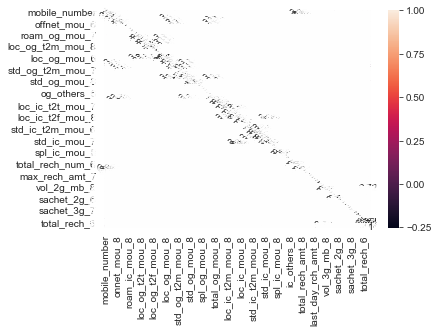

In [64]:
sns.heatmap(corr, annot =True)

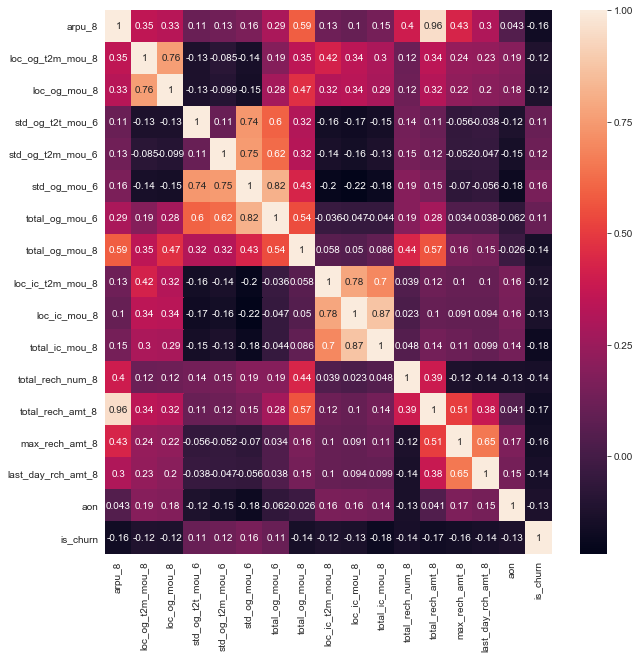

In [65]:
top_corr_features = corr.index[abs(corr["is_churn"])>0.1]
plt.figure(figsize=(10,10))
g = sns.heatmap(df_bkp[top_corr_features].corr(),annot=True)

In [66]:
corr = df_bkp.corr()
print(corr['is_churn'].sort_values(ascending=False))

is_churn              1.000000
std_og_mou_6          0.155742
std_og_t2m_mou_6      0.123558
std_og_t2t_mou_6      0.108710
total_og_mou_6        0.106340
onnet_mou_6           0.081188
offnet_mou_6          0.080218
std_og_mou_7          0.076411
total_rech_num_6      0.075794
arpu_6                0.064621
std_og_t2m_mou_7      0.061454
total_rech_amt_6      0.061303
std_og_t2t_mou_7      0.052598
roam_og_mou_8         0.049405
roam_og_mou_7         0.047934
total_rech_6          0.045737
roam_ic_mou_8         0.040278
roam_ic_mou_7         0.032433
spl_og_mou_6          0.024734
std_ic_mou_6          0.024074
std_ic_t2t_mou_6      0.023528
onnet_mou_7           0.023203
std_ic_t2m_mou_6      0.017696
roam_og_mou_6         0.015791
offnet_mou_7          0.015253
total_og_mou_7        0.013476
og_others_6           0.013471
sachet_3g_6           0.013176
spl_og_mou_7          0.011169
isd_og_mou_6          0.010384
loc_og_t2c_mou_7      0.009439
og_others_7           0.009306
roam_ic_

In [67]:
top_corr_features

Index(['arpu_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2m_mou_6', 'std_og_mou_6', 'total_og_mou_6', 'total_og_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'aon', 'is_churn'],
      dtype='object')

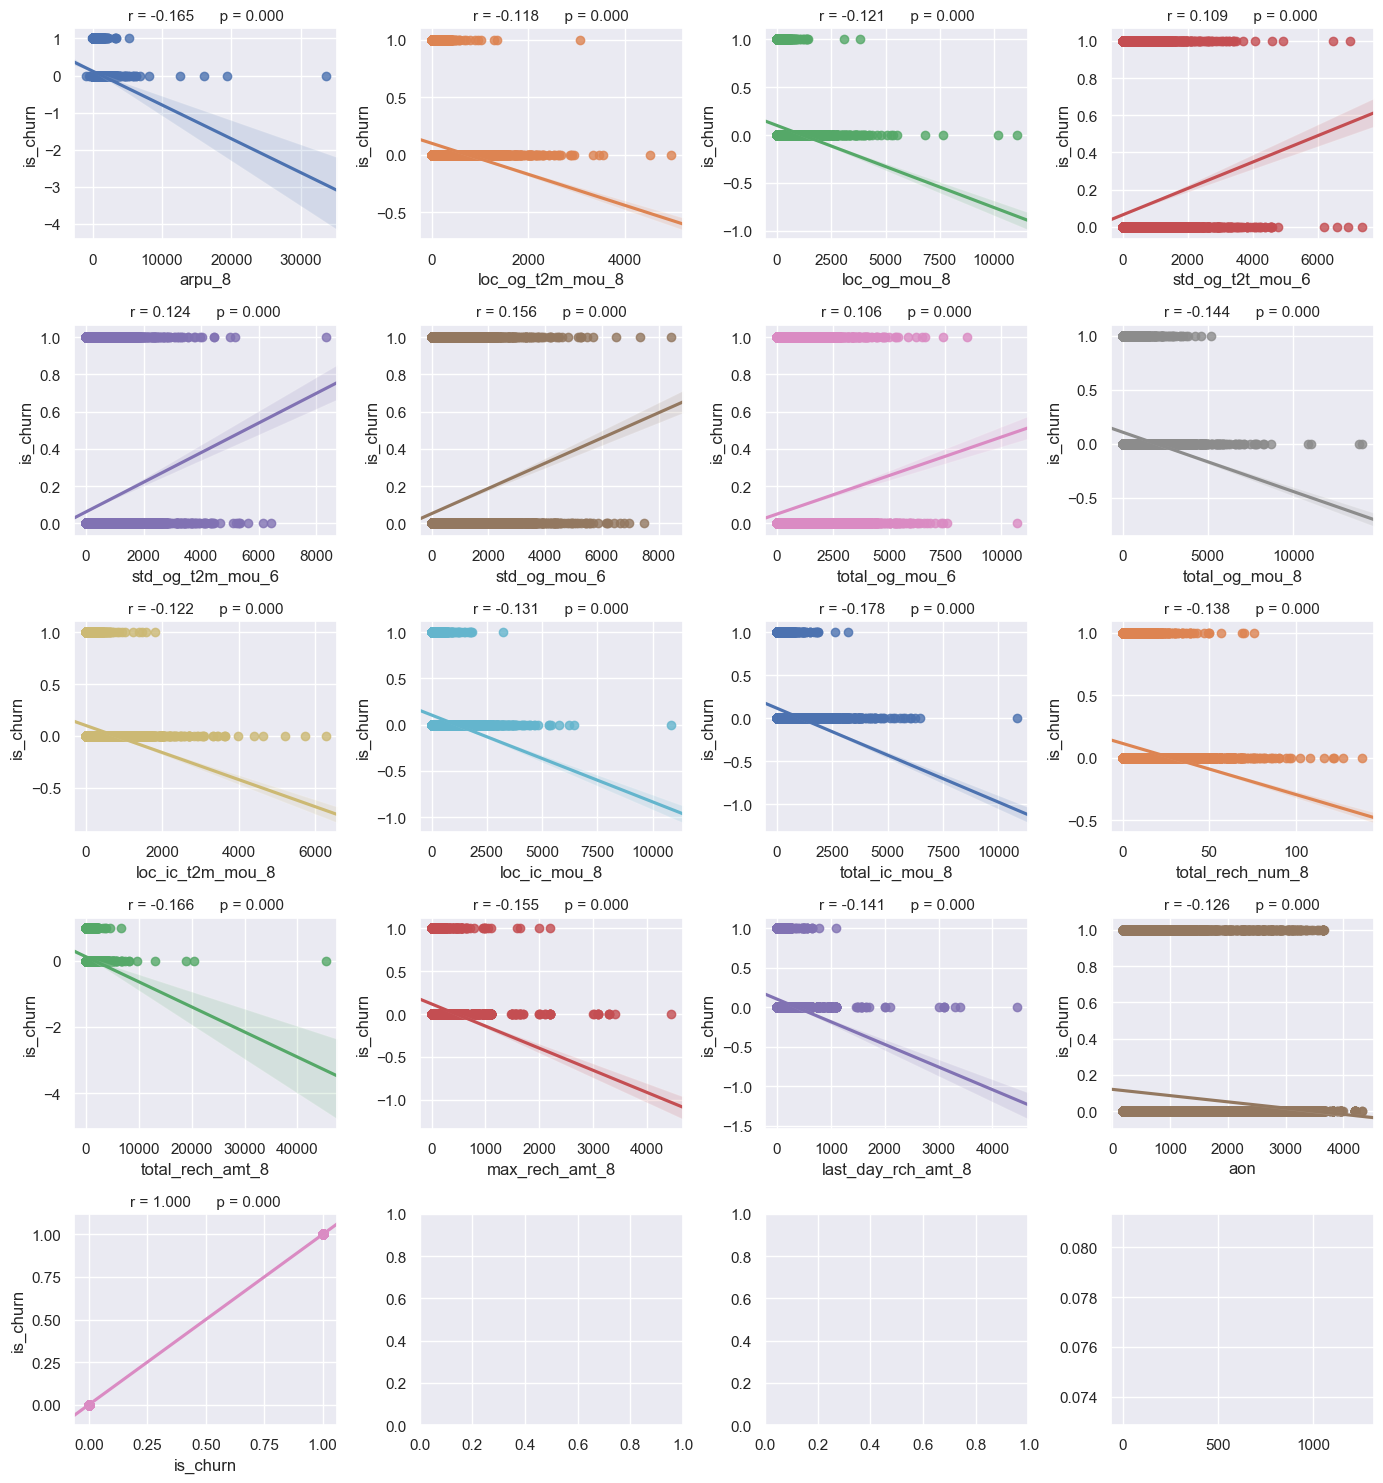

In [68]:
sns.set()

rows = 5
cols = 4
fig, axs = plt.subplots(rows,cols, figsize=(cols*3.5,rows*3),dpi=100)

num_col = ['arpu_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2m_mou_6', 'std_og_mou_6', 'total_og_mou_6', 'total_og_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'aon', 'is_churn']

for r in range(0,rows):
    for c in range(0,cols):  
        i = r*cols+c
        if i < len(num_col):
            sns.regplot(df_bkp[num_col[i]],df_bkp['is_churn'], ax = axs[r][c])
            stp = stats.pearsonr(df_bkp[num_col[i]], df_bkp['is_churn'])
            str_title = "r = " + "{0:.3f}".format(stp[0]) + "      " "p = " + "{0:.3f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)

plt.tight_layout()    
plt.show();

In [69]:
df_bkp['is_churn'].head()


6     0
7     1
13    0
21    0
24    0
Name: is_churn, dtype: int64

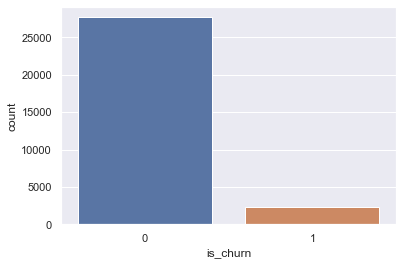

In [70]:
ax = sns.countplot(x="is_churn", data=df_bkp)


In [ ]:
#### Outliers Identificatiomn and treatment

ValueError: num must be 1 <= num <= 2, not 3

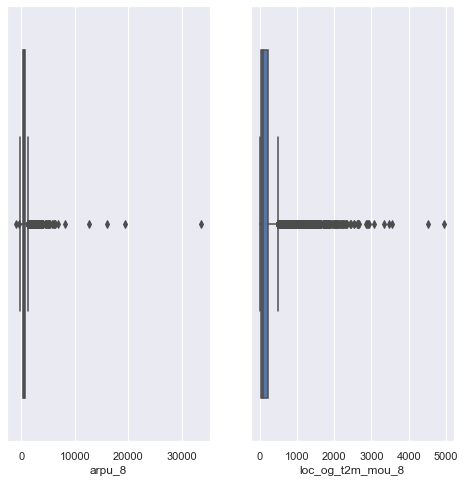

In [71]:
plt.figure(figsize=(8,8))
x=['arpu_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2m_mou_6', 'std_og_mou_6', 'total_og_mou_6', 'total_og_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'aon']
for i,j in enumerate(x):
    plt.subplot(1,2,i+1)
    sns.boxplot(df_bkp[j])
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = house_pred['arpu_8'], y = house_pred['is_churn'])
plt.ylabel('is_churn', fontsize=13)
plt.xlabel('arpu_8', fontsize=13)
plt.show()

In [74]:
# Removing (statistical) outliers from SalePrice
Q1 = df_bkp['arpu_8'].quantile(0.01)
Q3 = df_bkp['arpu_8'].quantile(0.99)
IQR = Q3 - Q1
df_bkp= df_bkp[(df_bkp['arpu_8'] >= Q1 - 1.5*IQR) & (df_bkp['arpu_8'] <= Q3 + 1.5*IQR)]





Q1 = df_bkp['loc_og_t2m_mou_8'].quantile(0.01)
Q3 = df_bkp['loc_og_t2m_mou_8'].quantile(0.99)
IQR = Q3 - Q1
df_bkp= df_bkp[(df_bkp['loc_og_t2m_mou_8'] >= Q1 - 1.5*IQR) & (df_bkp['loc_og_t2m_mou_8'] <= Q3 + 1.5*IQR)]


Q1 = df_bkp['loc_og_mou_8'].quantile(0.01)
Q3 = df_bkp['loc_og_mou_8'].quantile(0.99)
IQR = Q3 - Q1
df_bkp= df_bkp[(df_bkp['loc_og_mou_8'] >= Q1 - 1.5*IQR) & (df_bkp['loc_og_mou_8'] <= Q3 + 1.5*IQR)]



Q1 = df_bkp['spl_ic_mou_8'].quantile(0.01)
Q3 = df_bkp['spl_ic_mou_8'].quantile(0.99)
IQR = Q3 - Q1
df_bkp= df_bkp[(df_bkp['spl_ic_mou_8'] >= Q1 - 1.5*IQR) & (df_bkp['spl_ic_mou_8'] <= Q3 + 1.5*IQR)]






Q1 = df_bkp['std_og_t2t_mou_6'].quantile(0.01)
Q3 = df_bkp['std_og_t2t_mou_6'].quantile(0.99)
IQR = Q3 - Q1
df_bkp= df_bkp[(df_bkp['std_og_t2t_mou_6'] >= Q1 - 1.5*IQR) & (df_bkp['std_og_t2t_mou_6'] <= Q3 + 1.5*IQR)]





Q1 = df_bkp['std_og_t2m_mou_6'].quantile(0.01)
Q3 = df_bkp['std_og_t2m_mou_6'].quantile(0.99)
IQR = Q3 - Q1
df_bkp= df_bkp[(df_bkp['std_og_t2m_mou_6'] >= Q1 - 1.5*IQR) & (df_bkp['std_og_t2m_mou_6'] <= Q3 + 1.5*IQR)]





Q1 = df_bkp['std_og_mou_6'].quantile(0.01)
Q3 = df_bkp['std_og_mou_6'].quantile(0.99)
IQR = Q3 - Q1
df_bkp= df_bkp[(df_bkp['std_og_mou_6'] >= Q1 - 1.5*IQR) & (df_bkp['std_og_mou_6'] <= Q3 + 1.5*IQR)]




Q1 = df_bkp['total_og_mou_6'].quantile(0.01)
Q3 = df_bkp['total_og_mou_6'].quantile(0.99)
IQR = Q3 - Q1
df_bkp= df_bkp[(df_bkp['total_og_mou_6'] >= Q1 - 1.5*IQR) & (df_bkp['total_og_mou_6'] <= Q3 + 1.5*IQR)]



Q1 = df_bkp['total_og_mou_8'].quantile(0.01)
Q3 = df_bkp['total_og_mou_8'].quantile(0.99)
IQR = Q3 - Q1
df_bkp= df_bkp[(df_bkp['total_og_mou_8'] >= Q1 - 1.5*IQR) & (df_bkp['total_og_mou_8'] <= Q3 + 1.5*IQR)]

In [75]:
Q1 = df_bkp['total_rech_num_8'].quantile(0.01)
Q3 = df_bkp['total_rech_num_8'].quantile(0.99)
IQR = Q3 - Q1
df_bkp= df_bkp[(df_bkp['total_rech_num_8'] >= Q1 - 1.5*IQR) & (df_bkp['total_rech_num_8'] <= Q3 + 1.5*IQR)]



# Removing (statistical) outliers from SalePrice
Q1 = df_bkp['max_rech_amt_8'].quantile(0.01)
Q3 = df_bkp['max_rech_amt_8'].quantile(0.99)
IQR = Q3 - Q1
df_bkp= df_bkp[(df_bkp['max_rech_amt_8'] >= Q1 - 1.5*IQR) & (df_bkp['max_rech_amt_8'] <= Q3 + 1.5*IQR)]


Q1 = df_bkp['last_day_rch_amt_8'].quantile(0.01)
Q3 = df_bkp['last_day_rch_amt_8'].quantile(0.99)
IQR = Q3 - Q1
df_bkp= df_bkp[(df_bkp['last_day_rch_amt_8'] >= Q1 - 1.5*IQR) & (df_bkp['last_day_rch_amt_8'] <= Q3 + 1.5*IQR)]


Q1 = df_bkp['total_ic_mou_8'].quantile(0.01)
Q3 = df_bkp['total_ic_mou_8'].quantile(0.99)
IQR = Q3 - Q1
df_bkp= df_bkp[(df_bkp['total_ic_mou_8'] >= Q1 - 1.5*IQR) & (df_bkp['total_ic_mou_8'] <= Q3 + 1.5*IQR)]


Q1 = df_bkp['loc_ic_mou_8'].quantile(0.01)
Q3 = df_bkp['loc_ic_mou_8'].quantile(0.99)
IQR = Q3 - Q1
df_bkp= df_bkp[(df_bkp['loc_ic_mou_8'] >= Q1 - 1.5*IQR) & (df_bkp['loc_ic_mou_8'] <= Q3 + 1.5*IQR)]

Q1 = df_bkp['aon'].quantile(0.01)
Q3 = df_bkp['aon'].quantile(0.99)
IQR = Q3 - Q1
df_bkp= df_bkp[(df_bkp['aon'] >= Q1 - 1.5*IQR) & (df_bkp['aon'] <= Q3 + 1.5*IQR)]



Q1 = df_bkp['loc_ic_t2m_mou_8'].quantile(0.01)
Q3 = df_bkp['loc_ic_t2m_mou_8'].quantile(0.99)
IQR = Q3 - Q1
df_bkp= df_bkp[(df_bkp['loc_ic_t2m_mou_8'] >= Q1 - 1.5*IQR) & (df_bkp['loc_ic_t2m_mou_8'] <= Q3 + 1.5*IQR)]

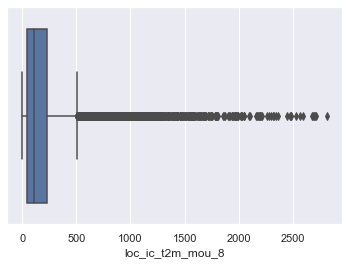

In [76]:
 sns.boxplot(df_bkp['loc_ic_t2m_mou_8'])

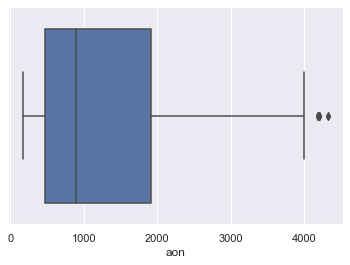

In [77]:

sns.boxplot(df_bkp['aon'])

In [79]:
# Checking the shape of the dataframe again
df_bkp.shape

(29880, 130)

In [80]:
# Calculating percentage of data lost because of outlier treatment
((len(df_bkp)-df_bkp.shape[0])/len(df_bkp))*100

0.0

In [82]:
#Divide the data into train & test.
X = df_bkp.drop(['is_churn'],axis=1)
y = df_bkp.is_churn

In [83]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state= 93)

In [84]:
#Scaling the data:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [85]:
#Class Imbalance check
y_train.value_counts(normalize=True)

0    0.923408
1    0.076592
Name: is_churn, dtype: float64

# Modelling


## Logistic Regression:

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


logreg = LogisticRegression(class_weight= "balanced")
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)
print("Accuracy: {}".format(metrics.accuracy_score(y_test,y_pred)))
print("Sensitivity/Recall: {}".format(metrics.recall_score(y_test,y_pred)))

Accuracy: 0.8502900490852298
Sensitivity/Recall: 0.8242857142857143


In [94]:
#Feature Selection Using RFE¶
from sklearn.feature_selection import RFE

rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [95]:
rfe.support_

array([False, False, False,  True, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True,  True, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
        True, False, False,  True, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,

In [98]:
type(X_train)

numpy.ndarray

In [99]:
list(zip(X.columns, rfe.support_, rfe.ranking_))

[('mobile_number', False, 84),
 ('arpu_6', False, 90),
 ('arpu_7', False, 9),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 7),
 ('onnet_mou_7', False, 55),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 10),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', False, 101),
 ('roam_ic_mou_6', False, 106),
 ('roam_ic_mou_7', False, 34),
 ('roam_ic_mou_8', False, 91),
 ('roam_og_mou_6', False, 47),
 ('roam_og_mou_7', False, 54),
 ('roam_og_mou_8', False, 85),
 ('loc_og_t2t_mou_6', False, 82),
 ('loc_og_t2t_mou_7', False, 33),
 ('loc_og_t2t_mou_8', False, 56),
 ('loc_og_t2m_mou_6', False, 79),
 ('loc_og_t2m_mou_7', False, 18),
 ('loc_og_t2m_mou_8', False, 17),
 ('loc_og_t2f_mou_6', False, 89),
 ('loc_og_t2f_mou_7', False, 78),
 ('loc_og_t2f_mou_8', False, 67),
 ('loc_og_t2c_mou_6', False, 83),
 ('loc_og_t2c_mou_7', False, 72),
 ('loc_og_t2c_mou_8', False, 92),
 ('loc_og_mou_6', False, 88),
 ('loc_og_mou_7', False, 32),
 ('loc_og_mou_8', False, 30),
 ('std_og_t2t_mou_6', False, 62),
 ('std_o

In [101]:
col = X.columns[rfe.support_]
col

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_7', 'std_og_t2m_mou_8',
       'std_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_7',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8',
       'isd_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8'],
      dtype='object')

## Inference:

Top Important features are: 
                               'arpu_8', 'onnet_mou_8', 'offnet_mou_7', 'std_og_t2m_mou_8',
                               'std_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_7',
                               'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8',
                               'std_ic_t2m_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8',
                               'isd_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
                               'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8'

In [104]:
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=3)
dt_default.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [105]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(X.columns[0:])
features


['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_

In [106]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  


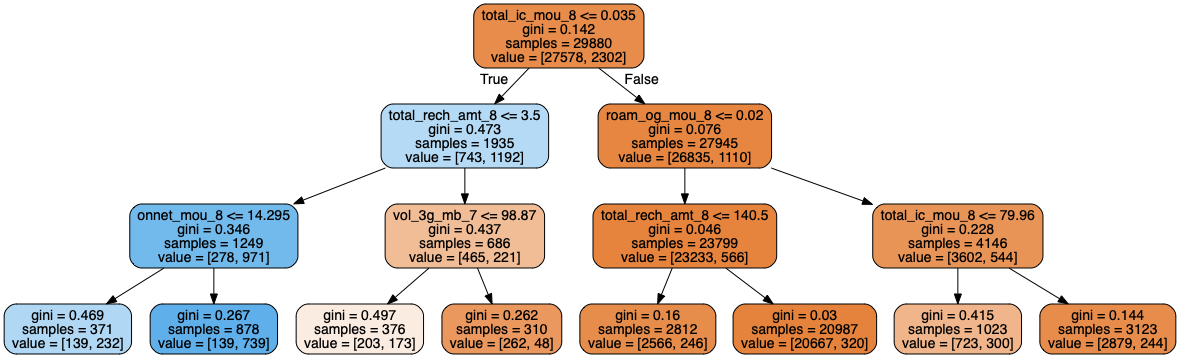

In [108]:

Image(graph.create_png())

In [109]:
# Check the current variance of each column
100*df_bkp.var()/sum(df_bkp.var())

mobile_number         9.999667e+01
arpu_6                3.081095e-05
arpu_7                3.190501e-05
arpu_8                3.270805e-05
onnet_mou_6           4.387785e-05
onnet_mou_7           4.752644e-05
onnet_mou_8           4.158199e-05
offnet_mou_6          4.556135e-05
offnet_mou_7          4.928773e-05
offnet_mou_8          4.311514e-05
roam_ic_mou_6         8.330677e-07
roam_ic_mou_7         6.955014e-07
roam_ic_mou_8         9.299746e-07
roam_og_mou_6         1.540295e-06
roam_og_mou_7         9.703628e-07
roam_og_mou_8         1.450810e-06
loc_og_t2t_mou_6      1.285112e-05
loc_og_t2t_mou_7      1.277277e-05
loc_og_t2t_mou_8      1.026105e-05
loc_og_t2m_mou_6      1.293096e-05
loc_og_t2m_mou_7      1.195512e-05
loc_og_t2m_mou_8      1.077096e-05
loc_og_t2f_mou_6      9.980251e-08
loc_og_t2f_mou_7      1.001757e-07
loc_og_t2f_mou_8      7.451227e-08
loc_og_t2c_mou_6      1.230236e-08
loc_og_t2c_mou_7      1.923377e-08
loc_og_t2c_mou_8      1.215476e-08
loc_og_mou_6        

In [110]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'randomized', random_state = 42)
pca.fit(df_bkp)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [111]:
 #first coponent of the first vector obtained from pca.components_
pca.components_

array([[-9.99999883e-01, -1.16452111e-05, -1.02352620e-05, ...,
         1.16199303e-05,  6.91887548e-06,  1.67812462e-08],
       [ 2.81425791e-05,  1.03511422e-01,  1.04776453e-01, ...,
         4.56926134e-01,  4.47613286e-01, -2.36478512e-06],
       [-3.86463677e-05, -6.31382487e-02, -8.75346013e-02, ...,
         4.18402873e-02,  7.72648801e-02, -5.89322857e-06],
       ...,
       [-0.00000000e+00, -3.82164613e-17,  6.40707404e-17, ...,
         6.25180452e-02,  1.55677344e-01,  1.05414037e-14],
       [-0.00000000e+00,  7.42597457e-20,  1.92347721e-18, ...,
         3.75721029e-01,  1.27189441e-01,  6.44447687e-15],
       [ 0.00000000e+00, -2.45329918e-14,  3.21232896e-14, ...,
        -4.31054005e-01,  8.15763301e-01,  5.02594690e-16]])

In [112]:
#What is the variance explained by the first principal component
pca.explained_variance_ratio_

array([9.99966980e-01, 9.69716630e-06, 6.63852902e-06, 3.00838029e-06,
       1.96306971e-06, 1.69238518e-06, 1.60497912e-06, 1.31091100e-06,
       1.02228788e-06, 7.13154281e-07, 6.69442936e-07, 5.67995683e-07,
       4.73085853e-07, 4.26741698e-07, 3.40030933e-07, 3.04808112e-07,
       2.84821331e-07, 2.58699147e-07, 1.84990757e-07, 1.72837937e-07,
       1.59665223e-07, 1.33500396e-07, 1.28179988e-07, 1.20937481e-07,
       1.11950344e-07, 1.03553241e-07, 8.77537884e-08, 8.35873705e-08,
       7.15088554e-08, 7.06121427e-08, 6.60007832e-08, 4.88255358e-08,
       4.57978569e-08, 4.51712437e-08, 3.95193727e-08, 3.64305534e-08,
       3.01360933e-08, 2.89613915e-08, 2.64113014e-08, 2.52736263e-08,
       2.33207593e-08, 1.70804464e-08, 1.69491865e-08, 1.44669059e-08,
       1.43661747e-08, 1.25044388e-08, 1.21245276e-08, 1.03153058e-08,
       9.11597170e-09, 8.90574539e-09, 8.83381942e-09, 8.02444516e-09,
       7.43672438e-09, 7.26871459e-09, 5.91044440e-09, 5.15747373e-09,
      

ValueError: x and y must have same first dimension, but have shapes (4,) and (130,)

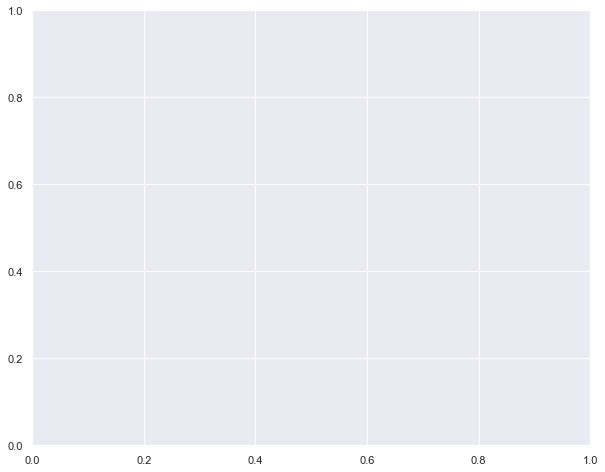

In [113]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (10,8))
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Coponents')
plt.ylabel('Cumulative Variance')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(criterion =  'gini', min_samples_leaf = 2, min_samples_split= 26, n_estimators = 1200)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("Accuracy: {}".format(metrics.accuracy_score(y_test,y_pred)))
print("Sensitivity/Recall: {}".format(metrics.recall_score(y_test,y_pred)))